In [1]:
from torchvision import transforms
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
################################################ Part 1 ##############################################################

In [3]:
Red1 = Image.open(r'C:\Users\nateisgreat98\Google Drive\Classes\Machine Learning\RT\HW1\Color Items\red_spice.jpg')
Red2 = Image.open(r'C:\Users\nateisgreat98\Google Drive\Classes\Machine Learning\RT\HW1\Color Items\red_lockers.jpg')
Blue1 = Image.open(r'C:\Users\nateisgreat98\Google Drive\Classes\Machine Learning\RT\HW1\Color Items\blue_cobalt.jpg')
Blue2 = Image.open(r'C:\Users\nateisgreat98\Google Drive\Classes\Machine Learning\RT\HW1\Color Items\blue_flower.jpg')
Green1 = Image.open(r'C:\Users\nateisgreat98\Google Drive\Classes\Machine Learning\RT\HW1\Color Items\green_field.jpg')
Green2 = Image.open(r'C:\Users\nateisgreat98\Google Drive\Classes\Machine Learning\RT\HW1\Color Items\green_snake.jpg')

In [4]:
trans = transforms.ToTensor()
r1data = trans(Red1)
r2data = trans(Red2)
b1data = trans(Blue1)
b2data = trans(Blue2)
g1data = trans(Green1)
g2data = trans(Green2)

In [5]:
r1mean = torch.mean(r1data, dim = [1,2])
r2mean = torch.mean(r2data, dim = [1,2])
b1mean = torch.mean(b1data, dim = [1,2])
b2mean = torch.mean(b2data, dim = [1,2])
g1mean = torch.mean(g1data, dim = [1,2])
g2mean = torch.mean(g2data, dim = [1,2])
print(r1mean)
print(r2mean)
print(b1mean)
print(b2mean)
print(g1mean)
print(g2mean)

tensor([0.6082, 0.1555, 0.0585])
tensor([0.8193, 0.2886, 0.2620])
tensor([0.3758, 0.3593, 0.5625])
tensor([0.3555, 0.4911, 0.7198])
tensor([0.2903, 0.4600, 0.0771])
tensor([0.3388, 0.3143, 0.1313])


In [6]:
################################################# Part 2 #############################################################

In [7]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [8]:
def model(t_u,w1,w2,b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [9]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [11]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [12]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2*(t_p - t_c)/t_p.size(0)
    return dsq_diffs

In [13]:
def dmodel_dw1(t_u,w1,w2,b):
    return t_u

In [14]:
def dmodel_dw2(t_u,w1,w2,b):
    return t_u**2

In [15]:
def dmodel_db(t_u,w1,w2,b):
    return 1.0

In [16]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u,w1,w2,b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u,w1,w2,b)
    dloss_db = dloss_dtp * dmodel_db(t_u,w1,w2,b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

In [17]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
        params = params - learning_rate*grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [18]:
t_un = 0.1 * t_u

In [19]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([-0.8881,  0.5570, -0.8753])

In [20]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0,1.0, 0.0]),
t_u = t_un,
t_c = t_c,)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


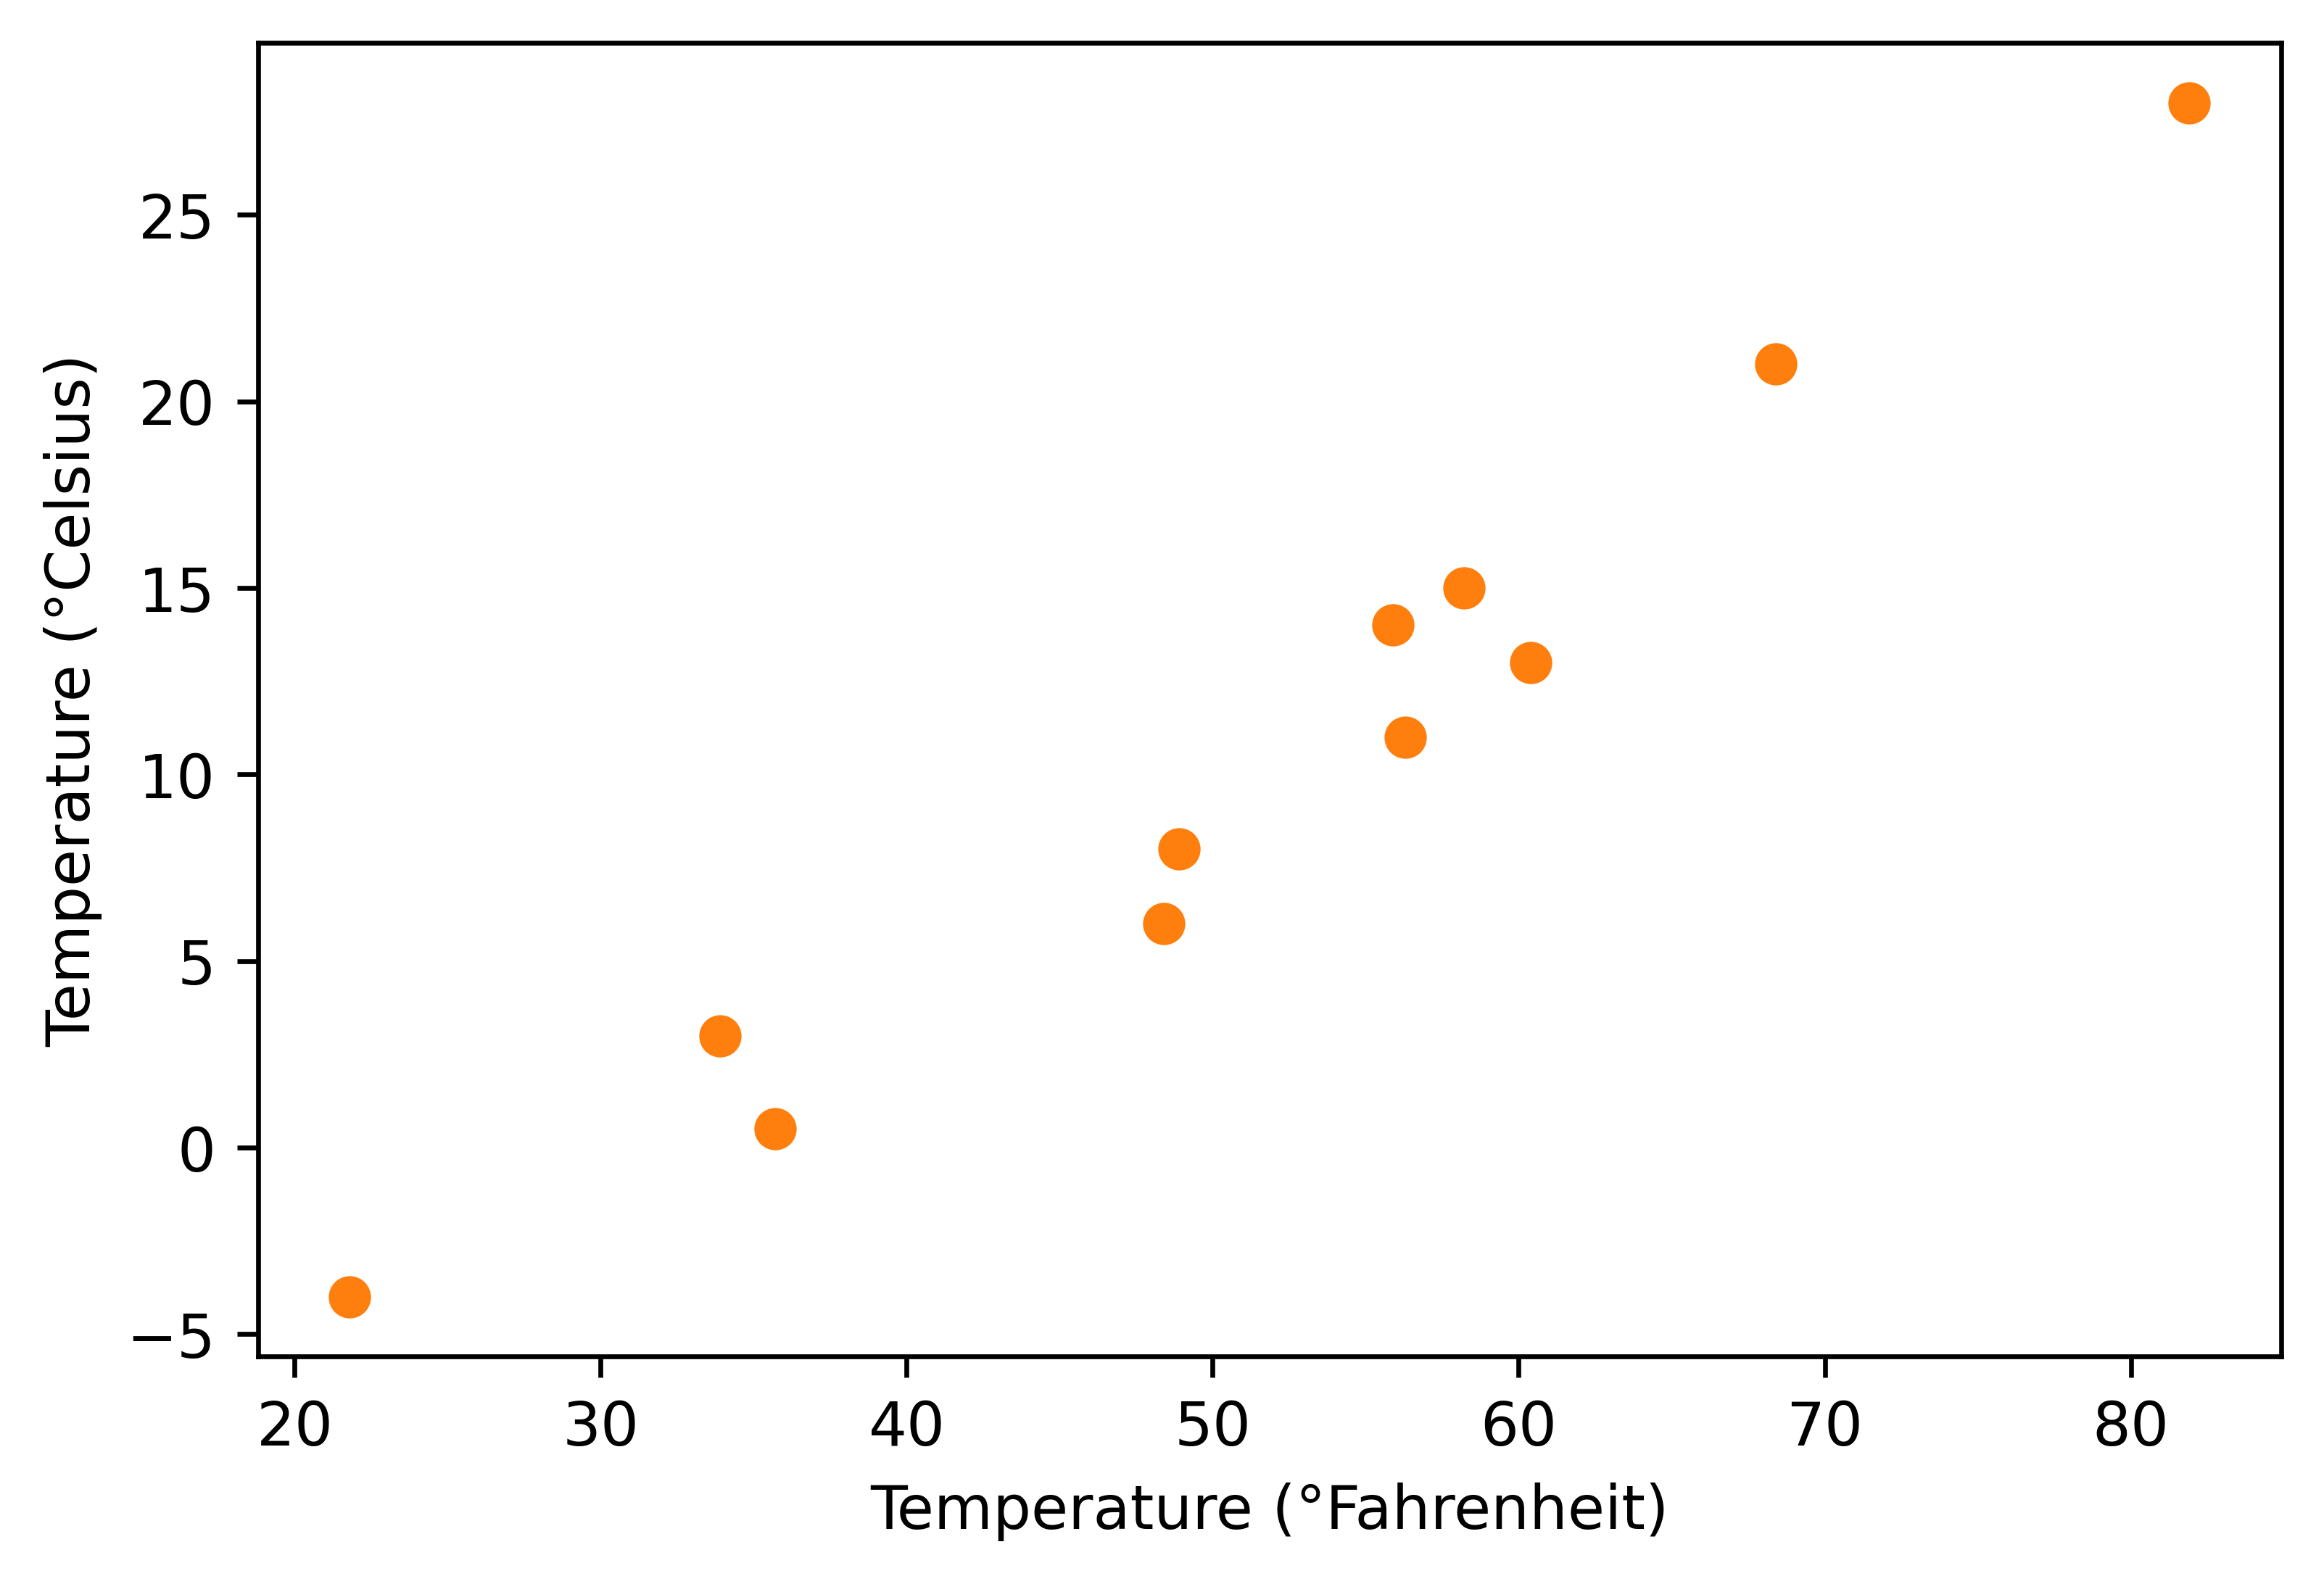

In [21]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [22]:
#Failure to converge at 0.1 learning rate

In [23]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0,1.0, 0.0]),
t_u = t_un,
t_c = t_c,)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


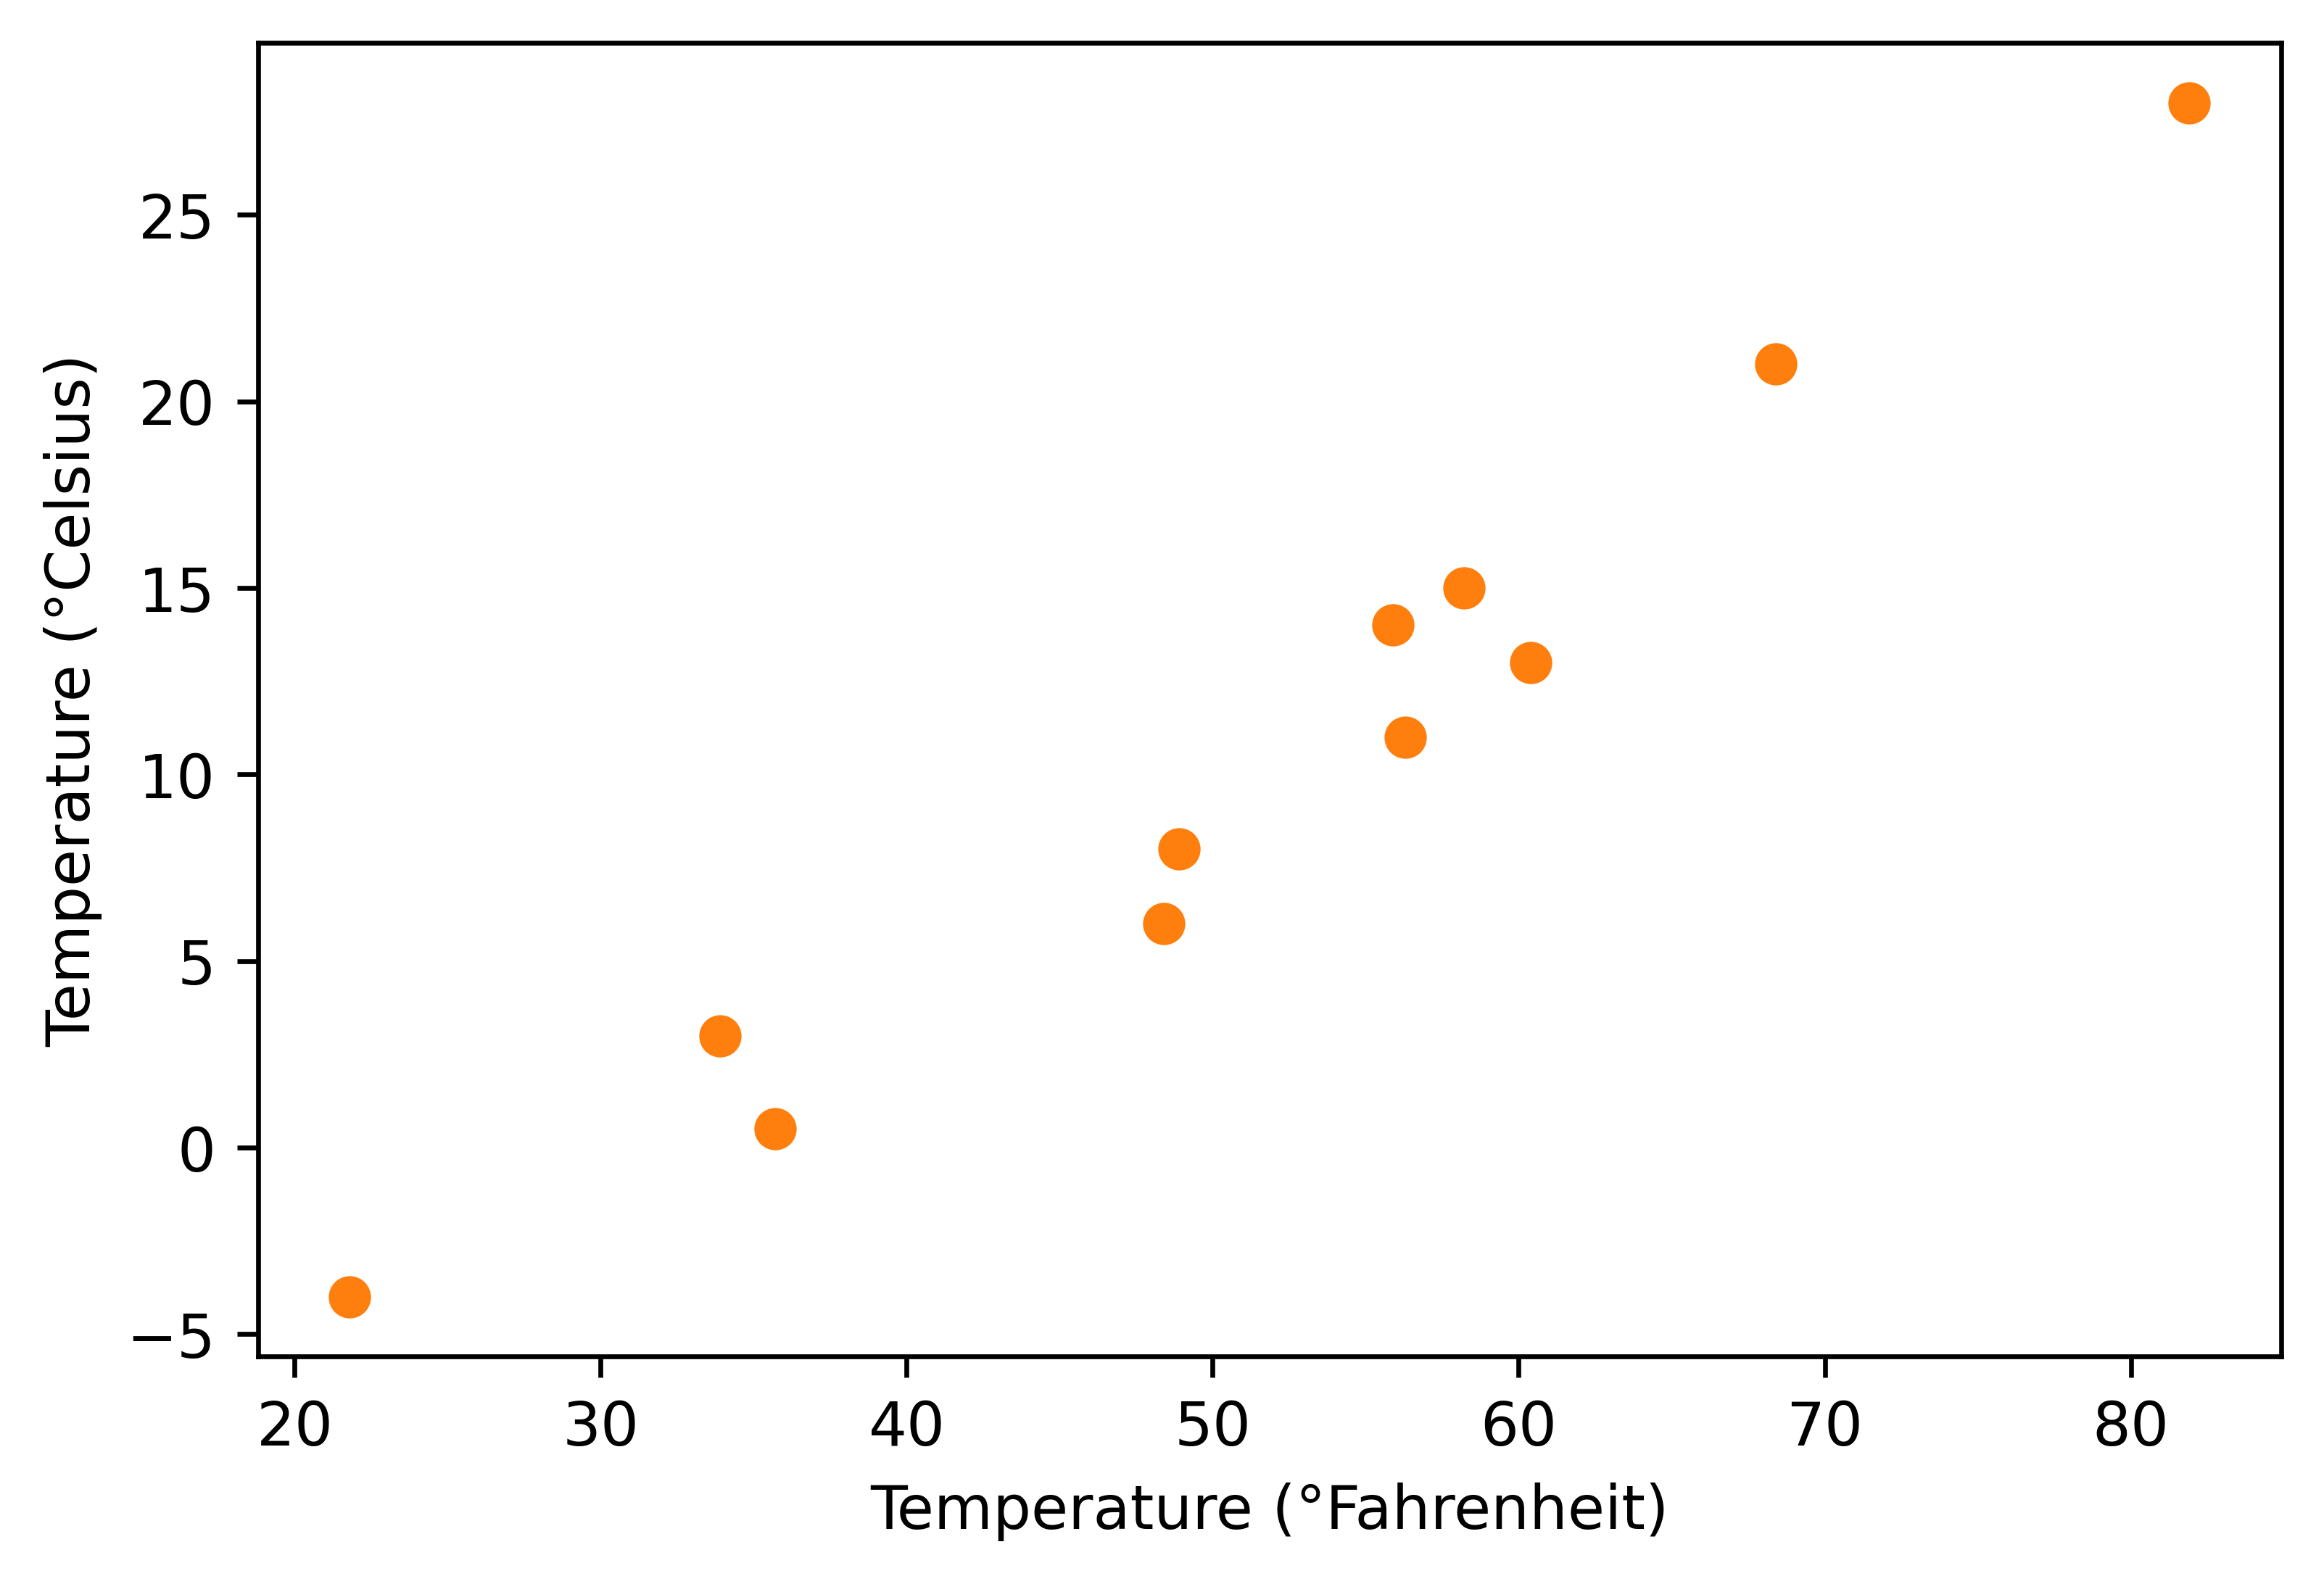

In [24]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [25]:
#Failure to converge

In [26]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0,1.0, 0.0]),
t_u = t_un,
t_c = t_c,)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


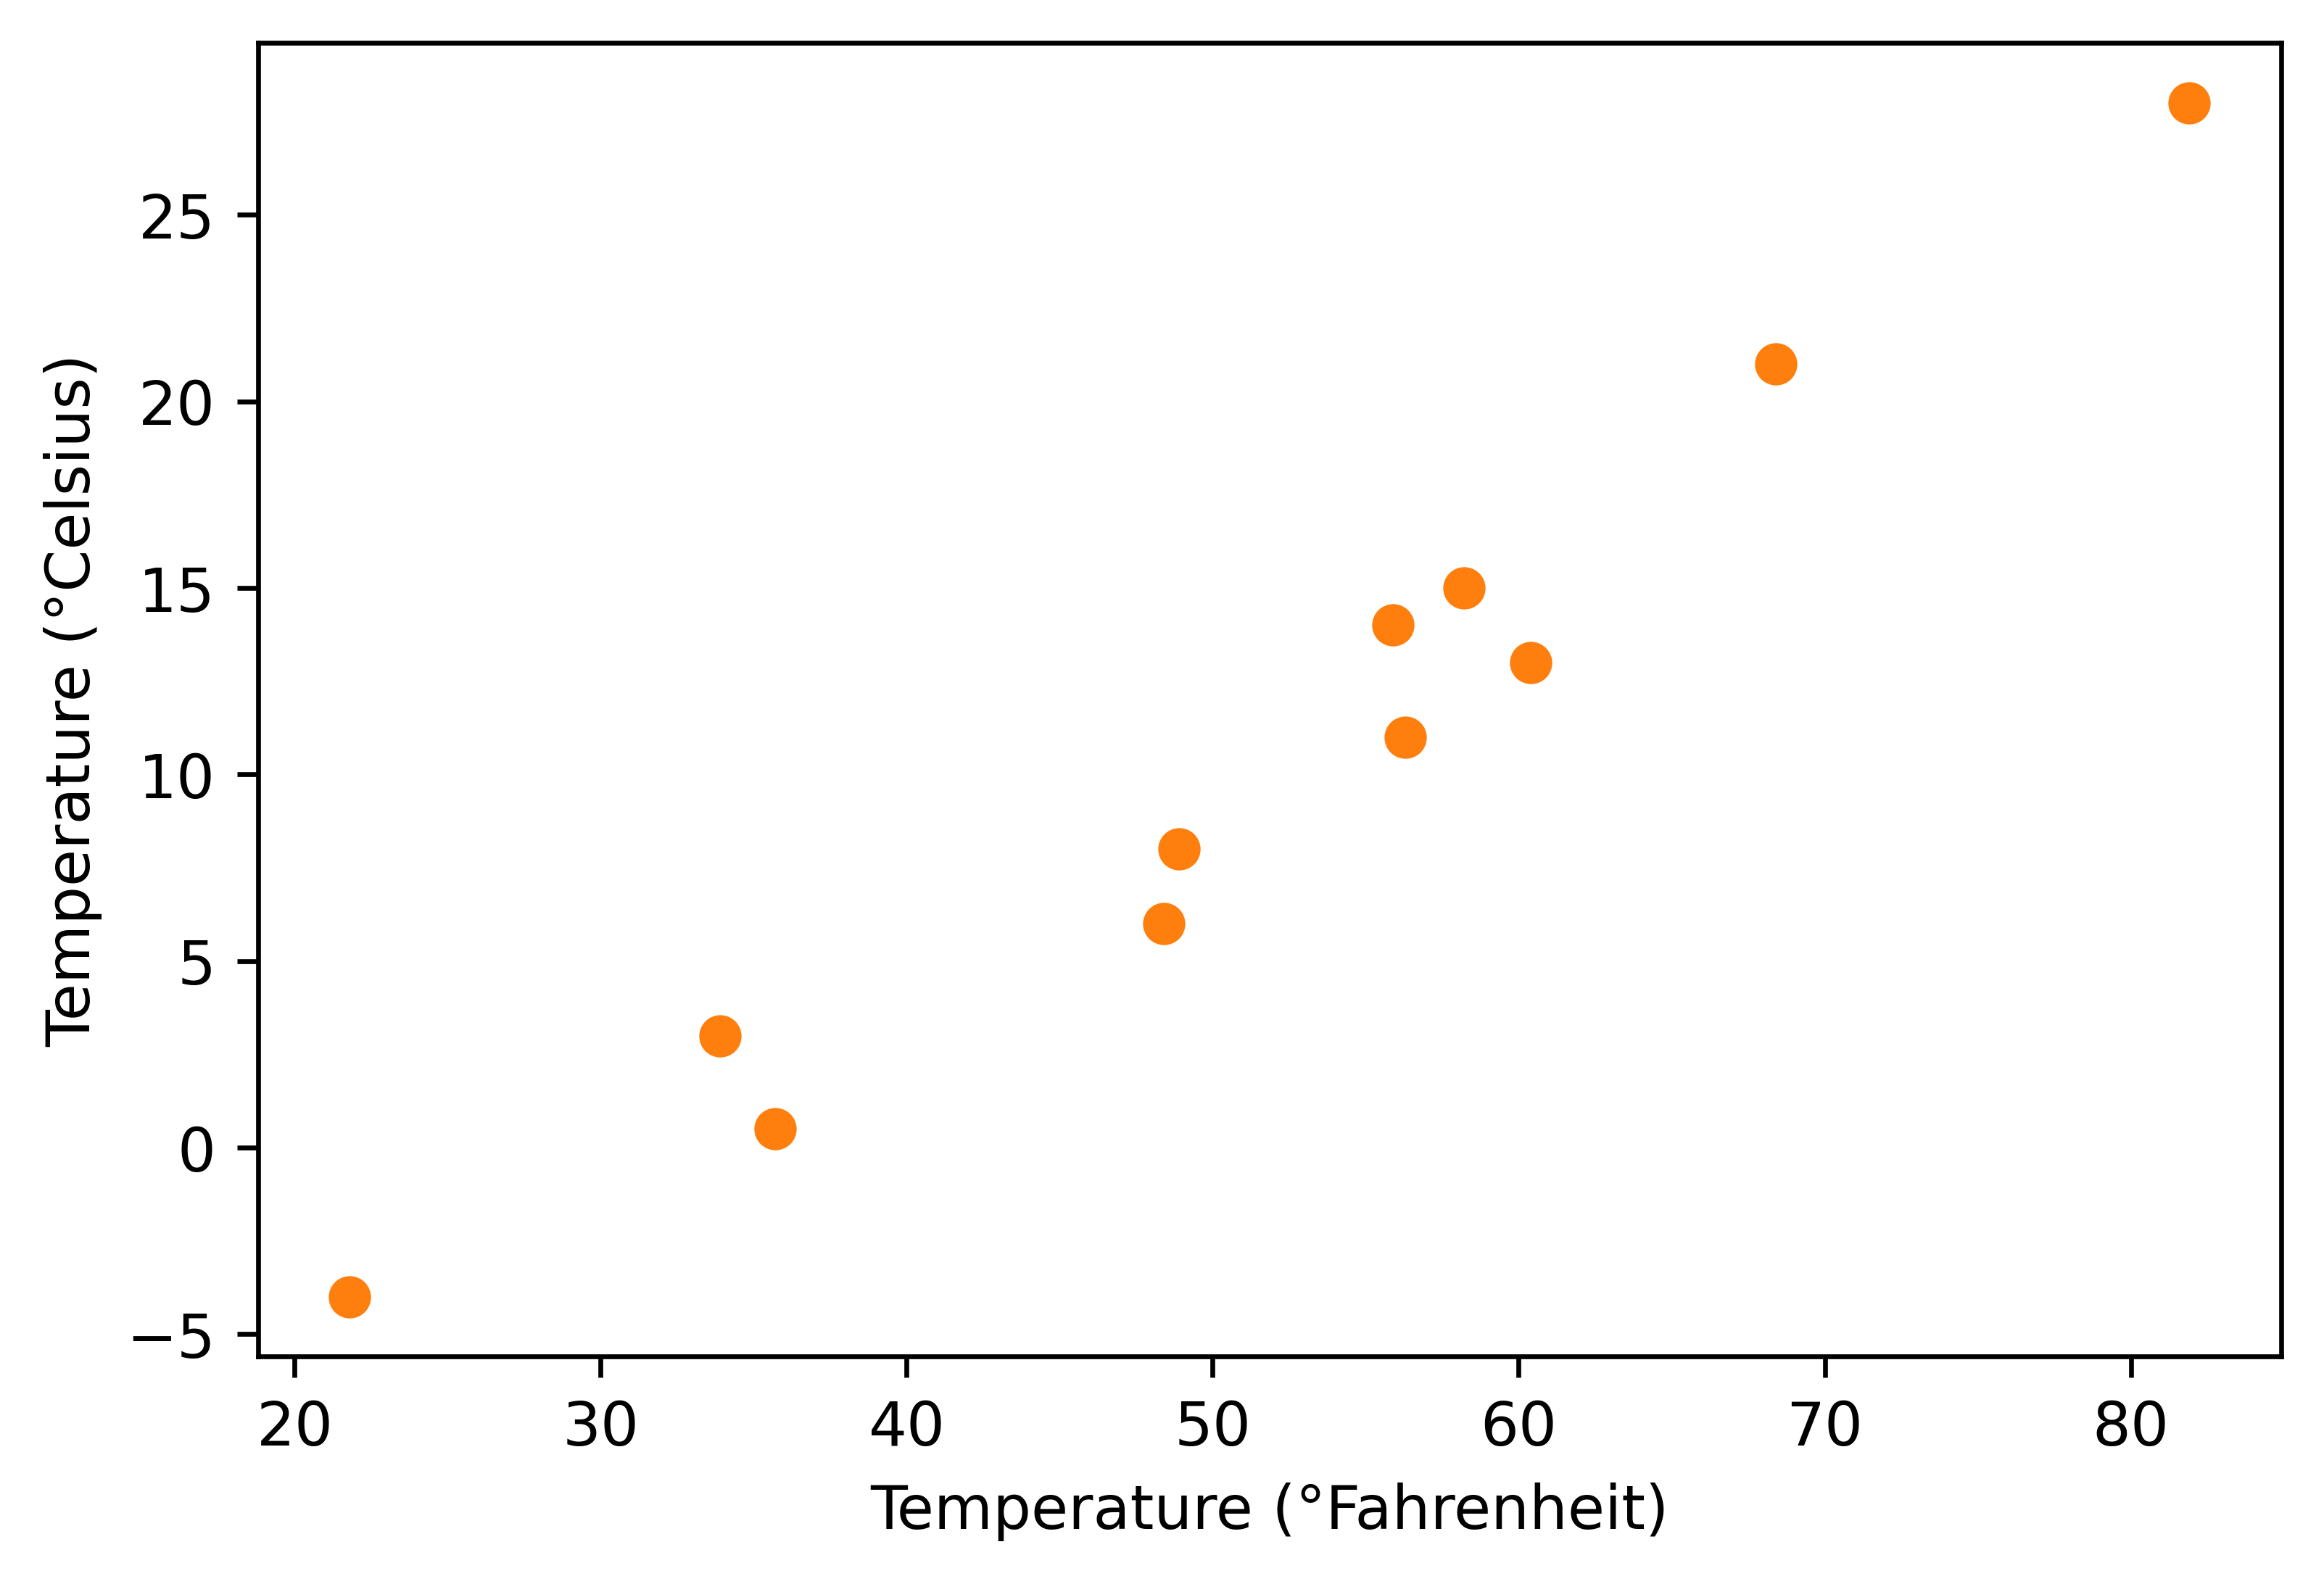

In [27]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [28]:
#Failure to converge

In [29]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0,1.0, 0.0]),
t_u = t_un,
t_c = t_c,)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


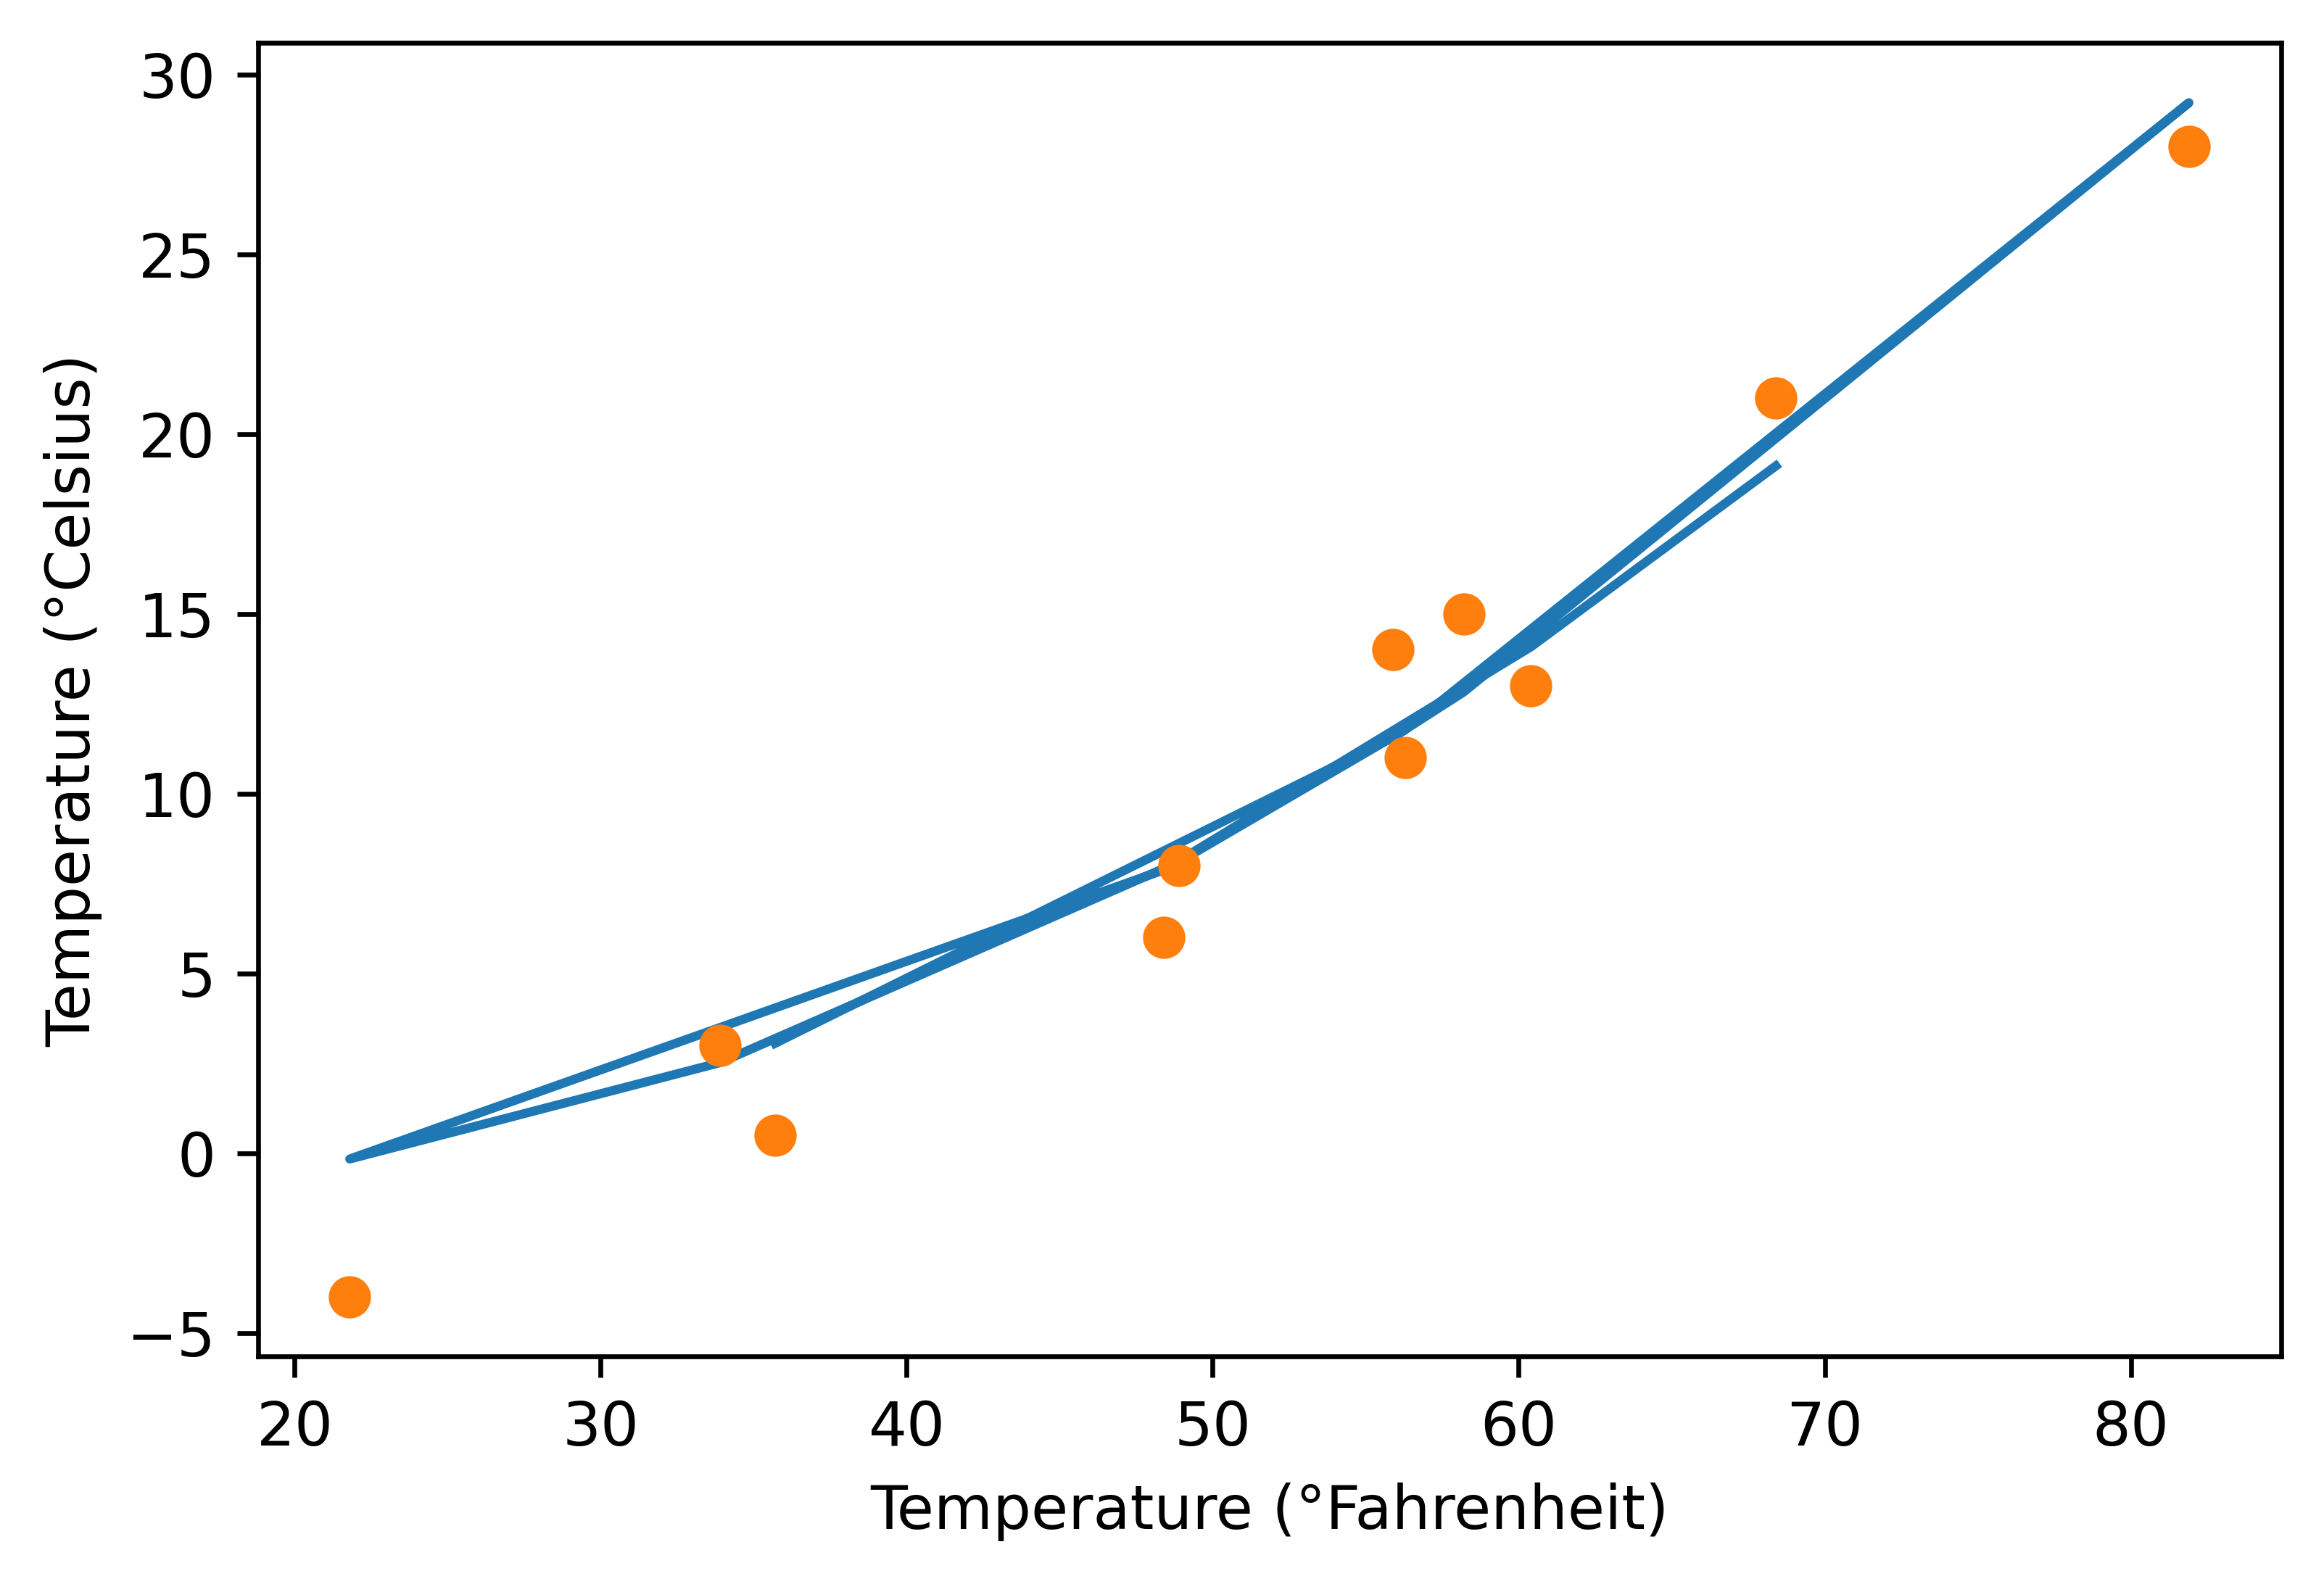

In [30]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [31]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-5,
params = torch.tensor([1.0,1.0, 0.0]),
t_u = t_un,
t_c = t_c,)

Epoch 500, Loss 13.269526
Epoch 1000, Loss 12.944256
Epoch 1500, Loss 12.629864
Epoch 2000, Loss 12.325988
Epoch 2500, Loss 12.032271
Epoch 3000, Loss 11.748377
Epoch 3500, Loss 11.473977
Epoch 4000, Loss 11.208754
Epoch 4500, Loss 10.952396
Epoch 5000, Loss 10.704611


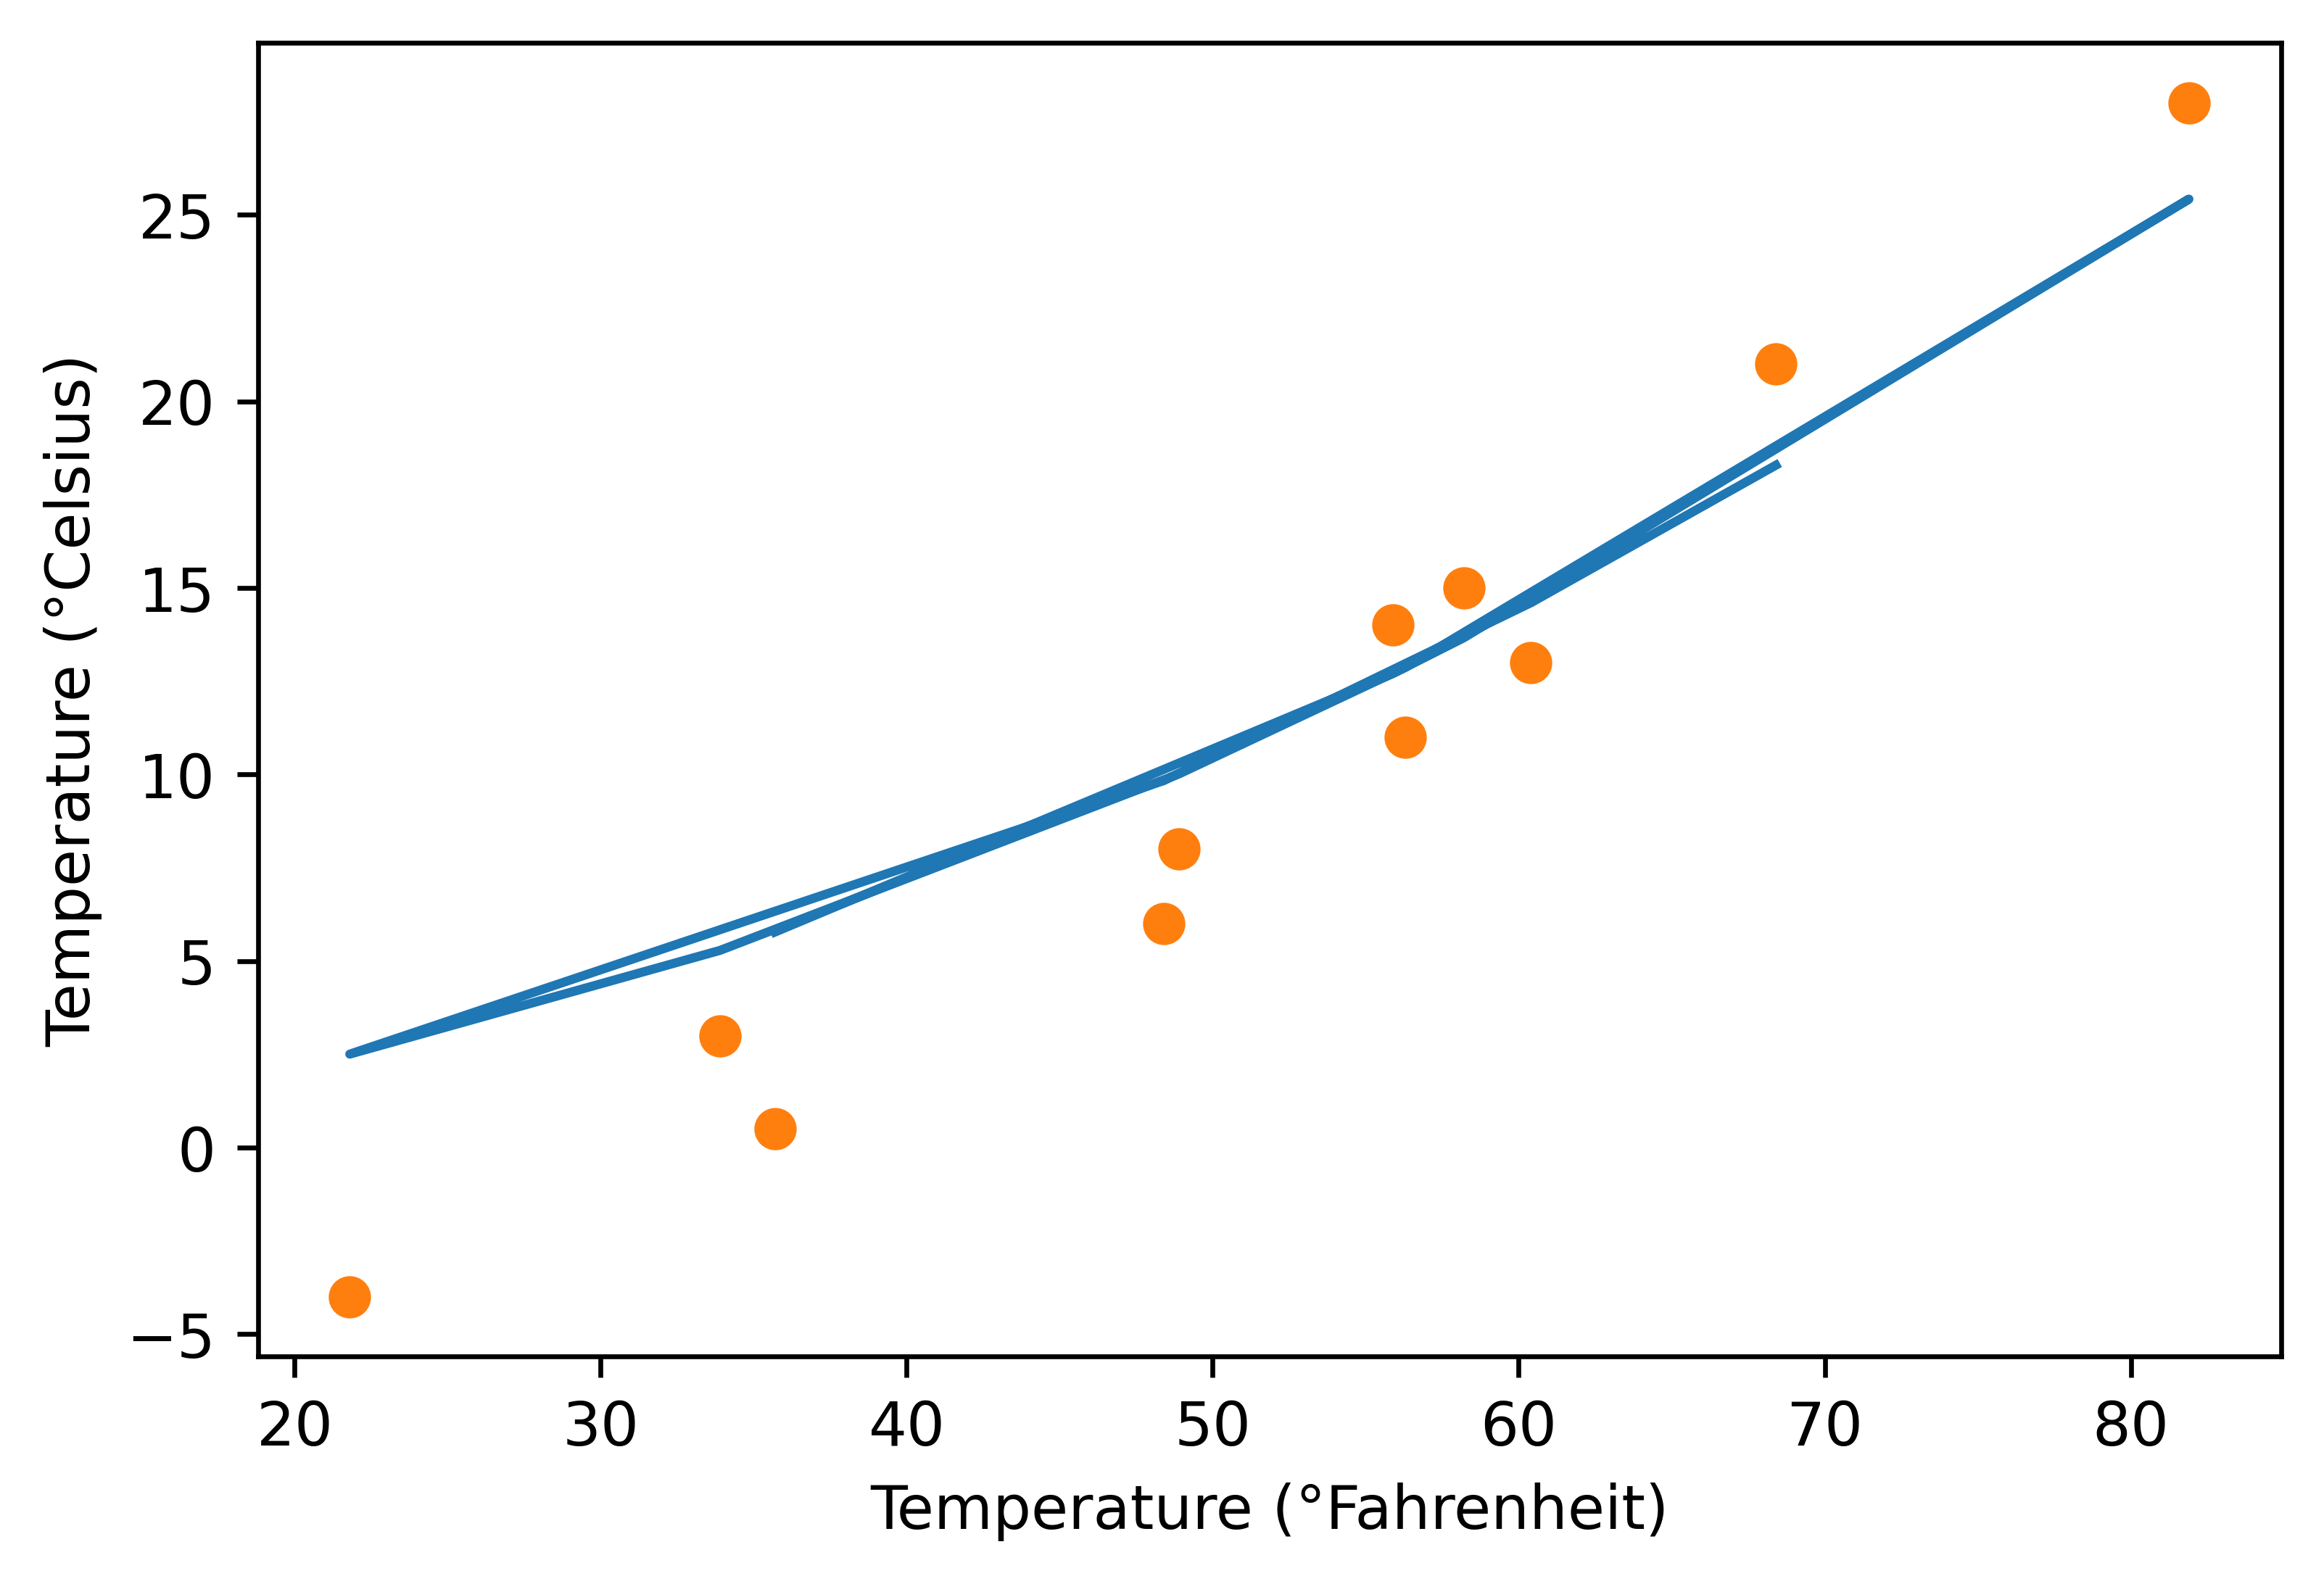

In [32]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [33]:
# I just wanted to do an additonal training that was successful for comparison

In [34]:
################################################ Part 3 ##############################################################

In [35]:
housing = pd.read_csv(r'C:\Users\nateisgreat98\Downloads\Intro to ML\Intro to ML\Homework\Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
ReData = housing[variables] 
ReData.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [37]:
t_area = torch.tensor(ReData['area'])
t_bedrooms = torch.tensor(ReData['bedrooms'])
t_bathrooms = torch.tensor(ReData['bathrooms'])
t_stories = torch.tensor(ReData['stories'])
t_parking = torch.tensor(ReData['parking'])
t_price = torch.tensor(ReData['price'])

In [38]:
N_t_area = t_area / max(ReData['area'])
N_t_bedrooms = t_bedrooms / max(ReData['bedrooms'])
N_t_bathrooms = t_bathrooms / max(ReData['bathrooms'])
N_t_stories = t_stories / max(ReData['stories'])
N_t_parking = t_parking / max(ReData['parking'])

In [39]:
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [40]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

In [41]:
params.grad is None

True

In [42]:
loss = loss_fn(model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params), t_price)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [43]:
if params.grad is not None:
    params.grad.zero_()

In [44]:
def training_loop2(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [45]:
params = training_loop2(
    n_epochs = 5000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = N_t_area,
    t_bedrooms = N_t_bedrooms,
    t_bathrooms = N_t_bathrooms,
    t_stories = N_t_stories,
    t_parking = N_t_parking,
    t_price = t_price)

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


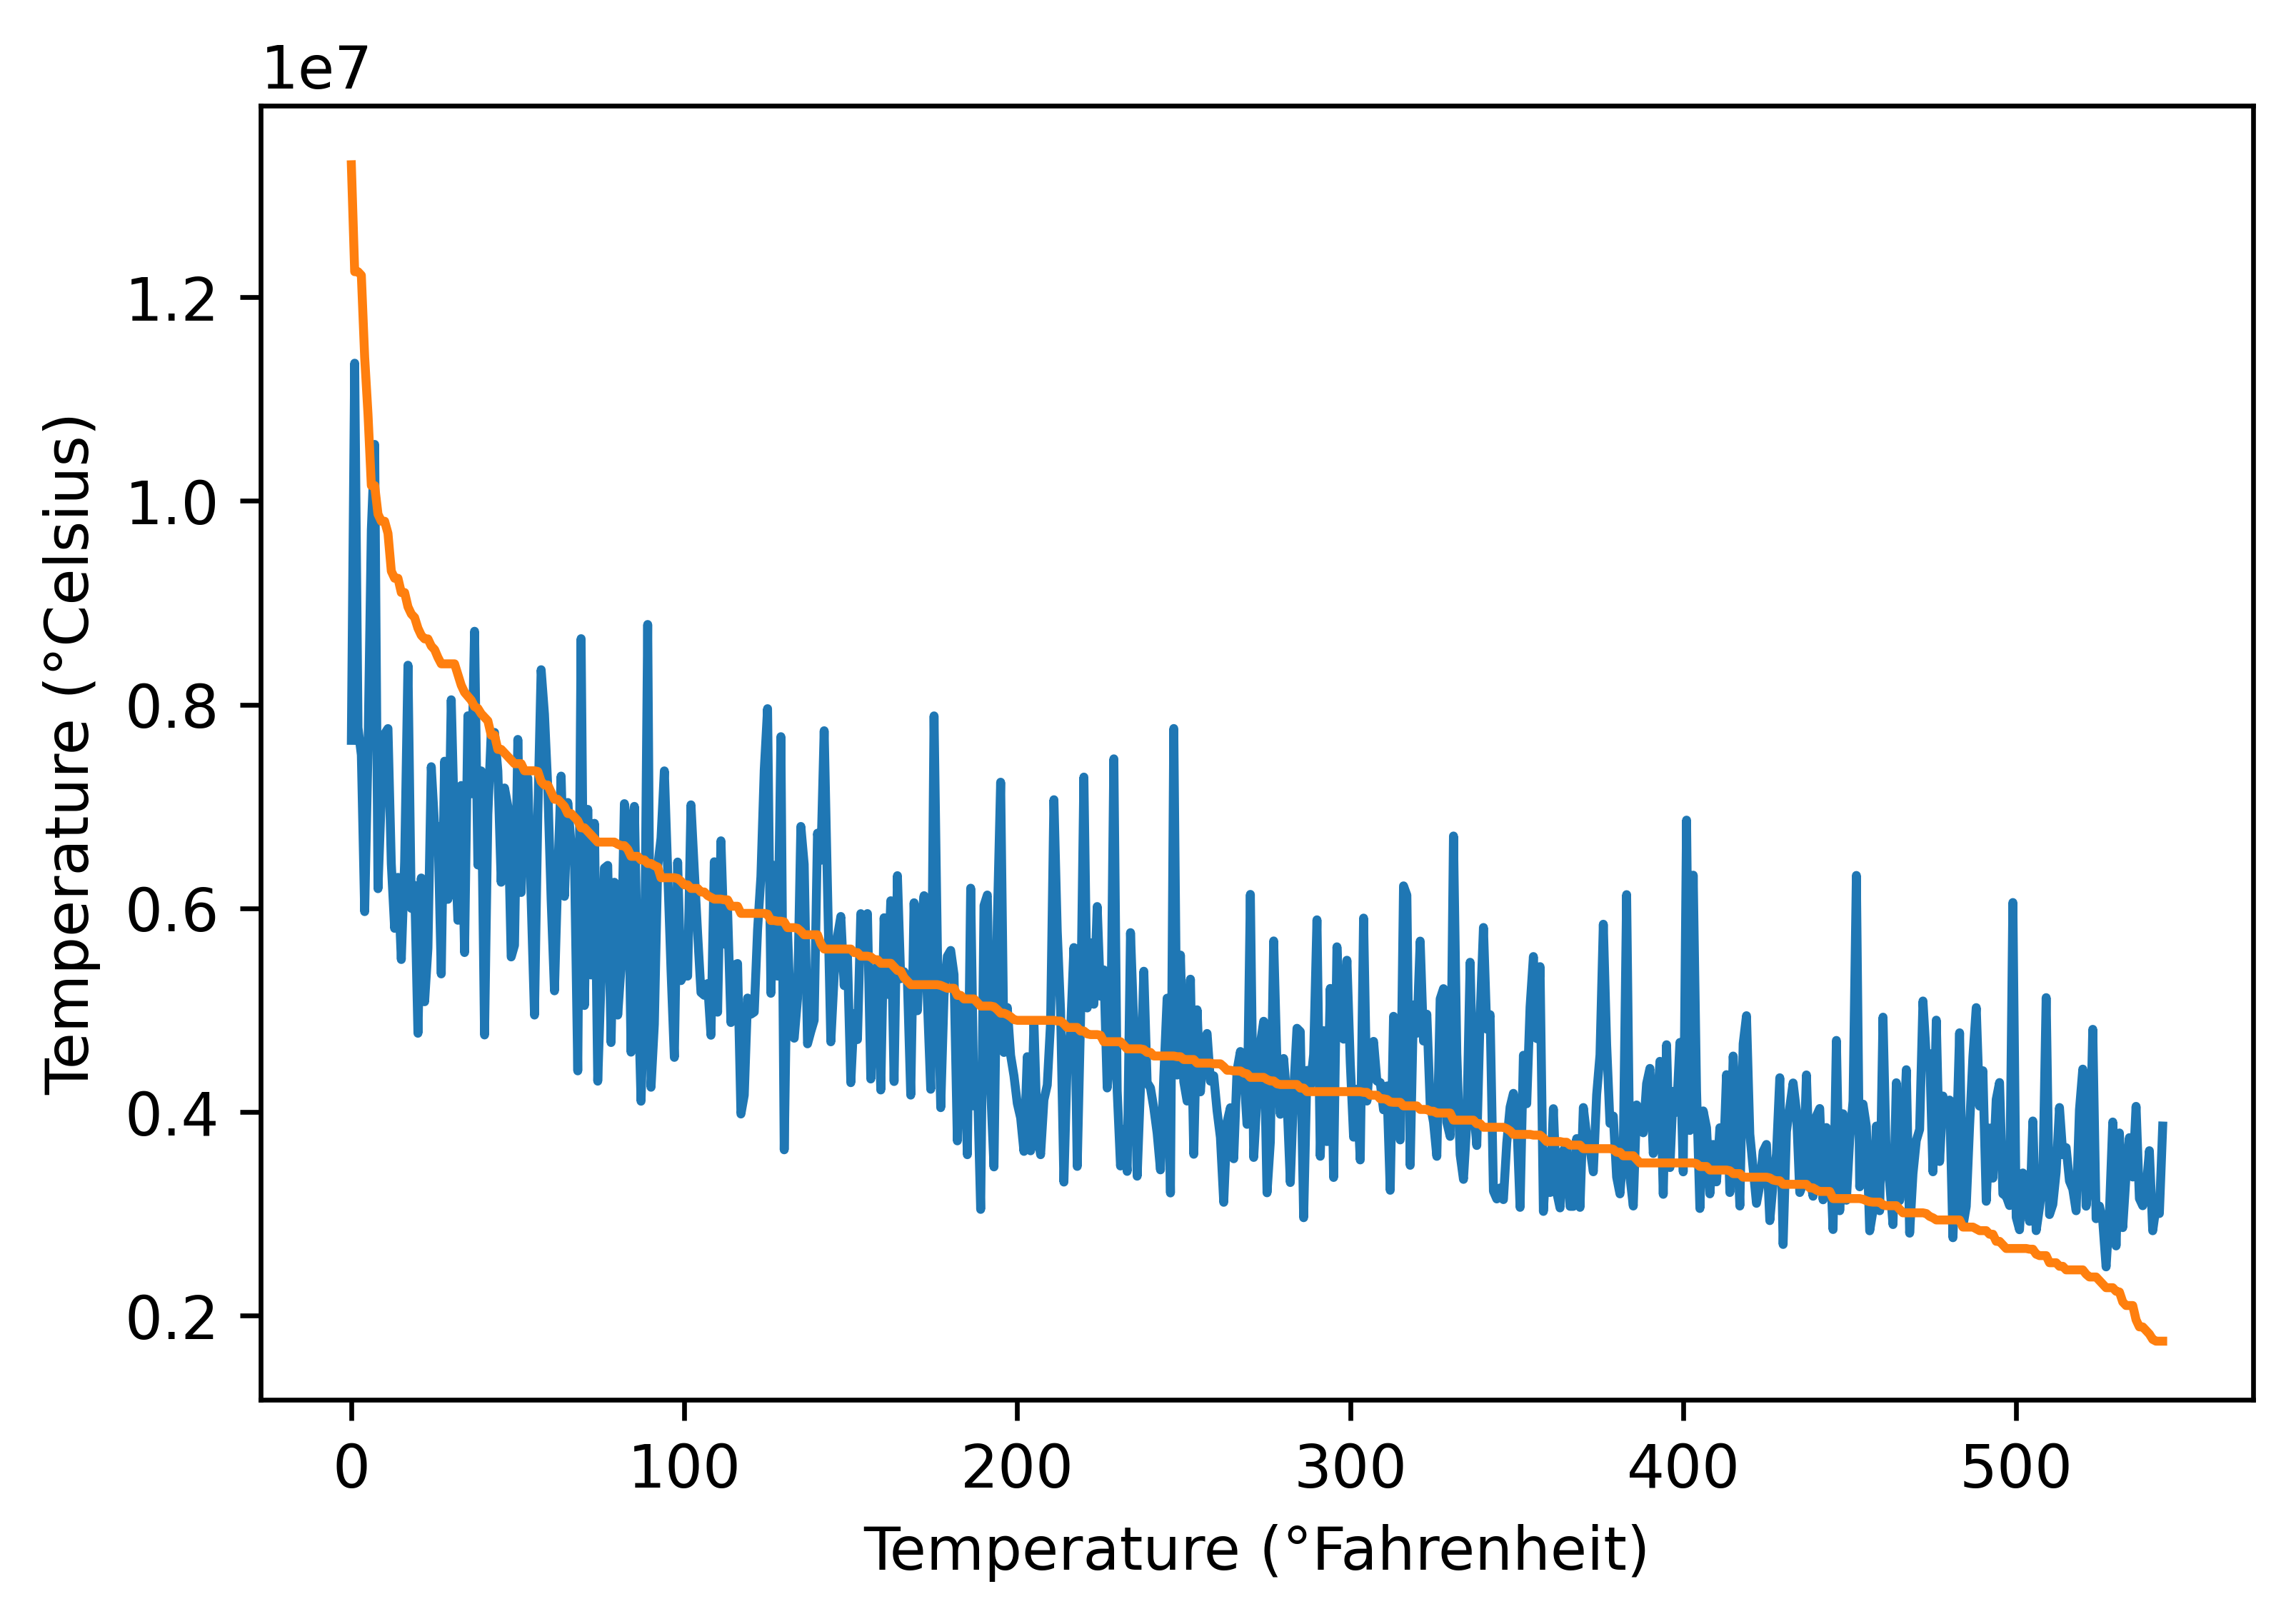

In [46]:
t_p = model(N_t_area, N_t_bedrooms, N_t_bathrooms, N_t_stories, N_t_parking, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)

In [47]:
params = training_loop2(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = N_t_area,
    t_bedrooms = N_t_bedrooms,
    t_bathrooms = N_t_bathrooms,
    t_stories = N_t_stories,
    t_parking = N_t_parking,
    t_price = t_price)

Epoch 500, Loss 2024805761024.000000
Epoch 1000, Loss 1863258734592.000000
Epoch 1500, Loss 1768051179520.000000
Epoch 2000, Loss 1704594898944.000000
Epoch 2500, Loss 1659788853248.000000
Epoch 3000, Loss 1627244199936.000000
Epoch 3500, Loss 1603242295296.000000
Epoch 4000, Loss 1585383211008.000000
Epoch 4500, Loss 1572023042048.000000
Epoch 5000, Loss 1561993281536.000000


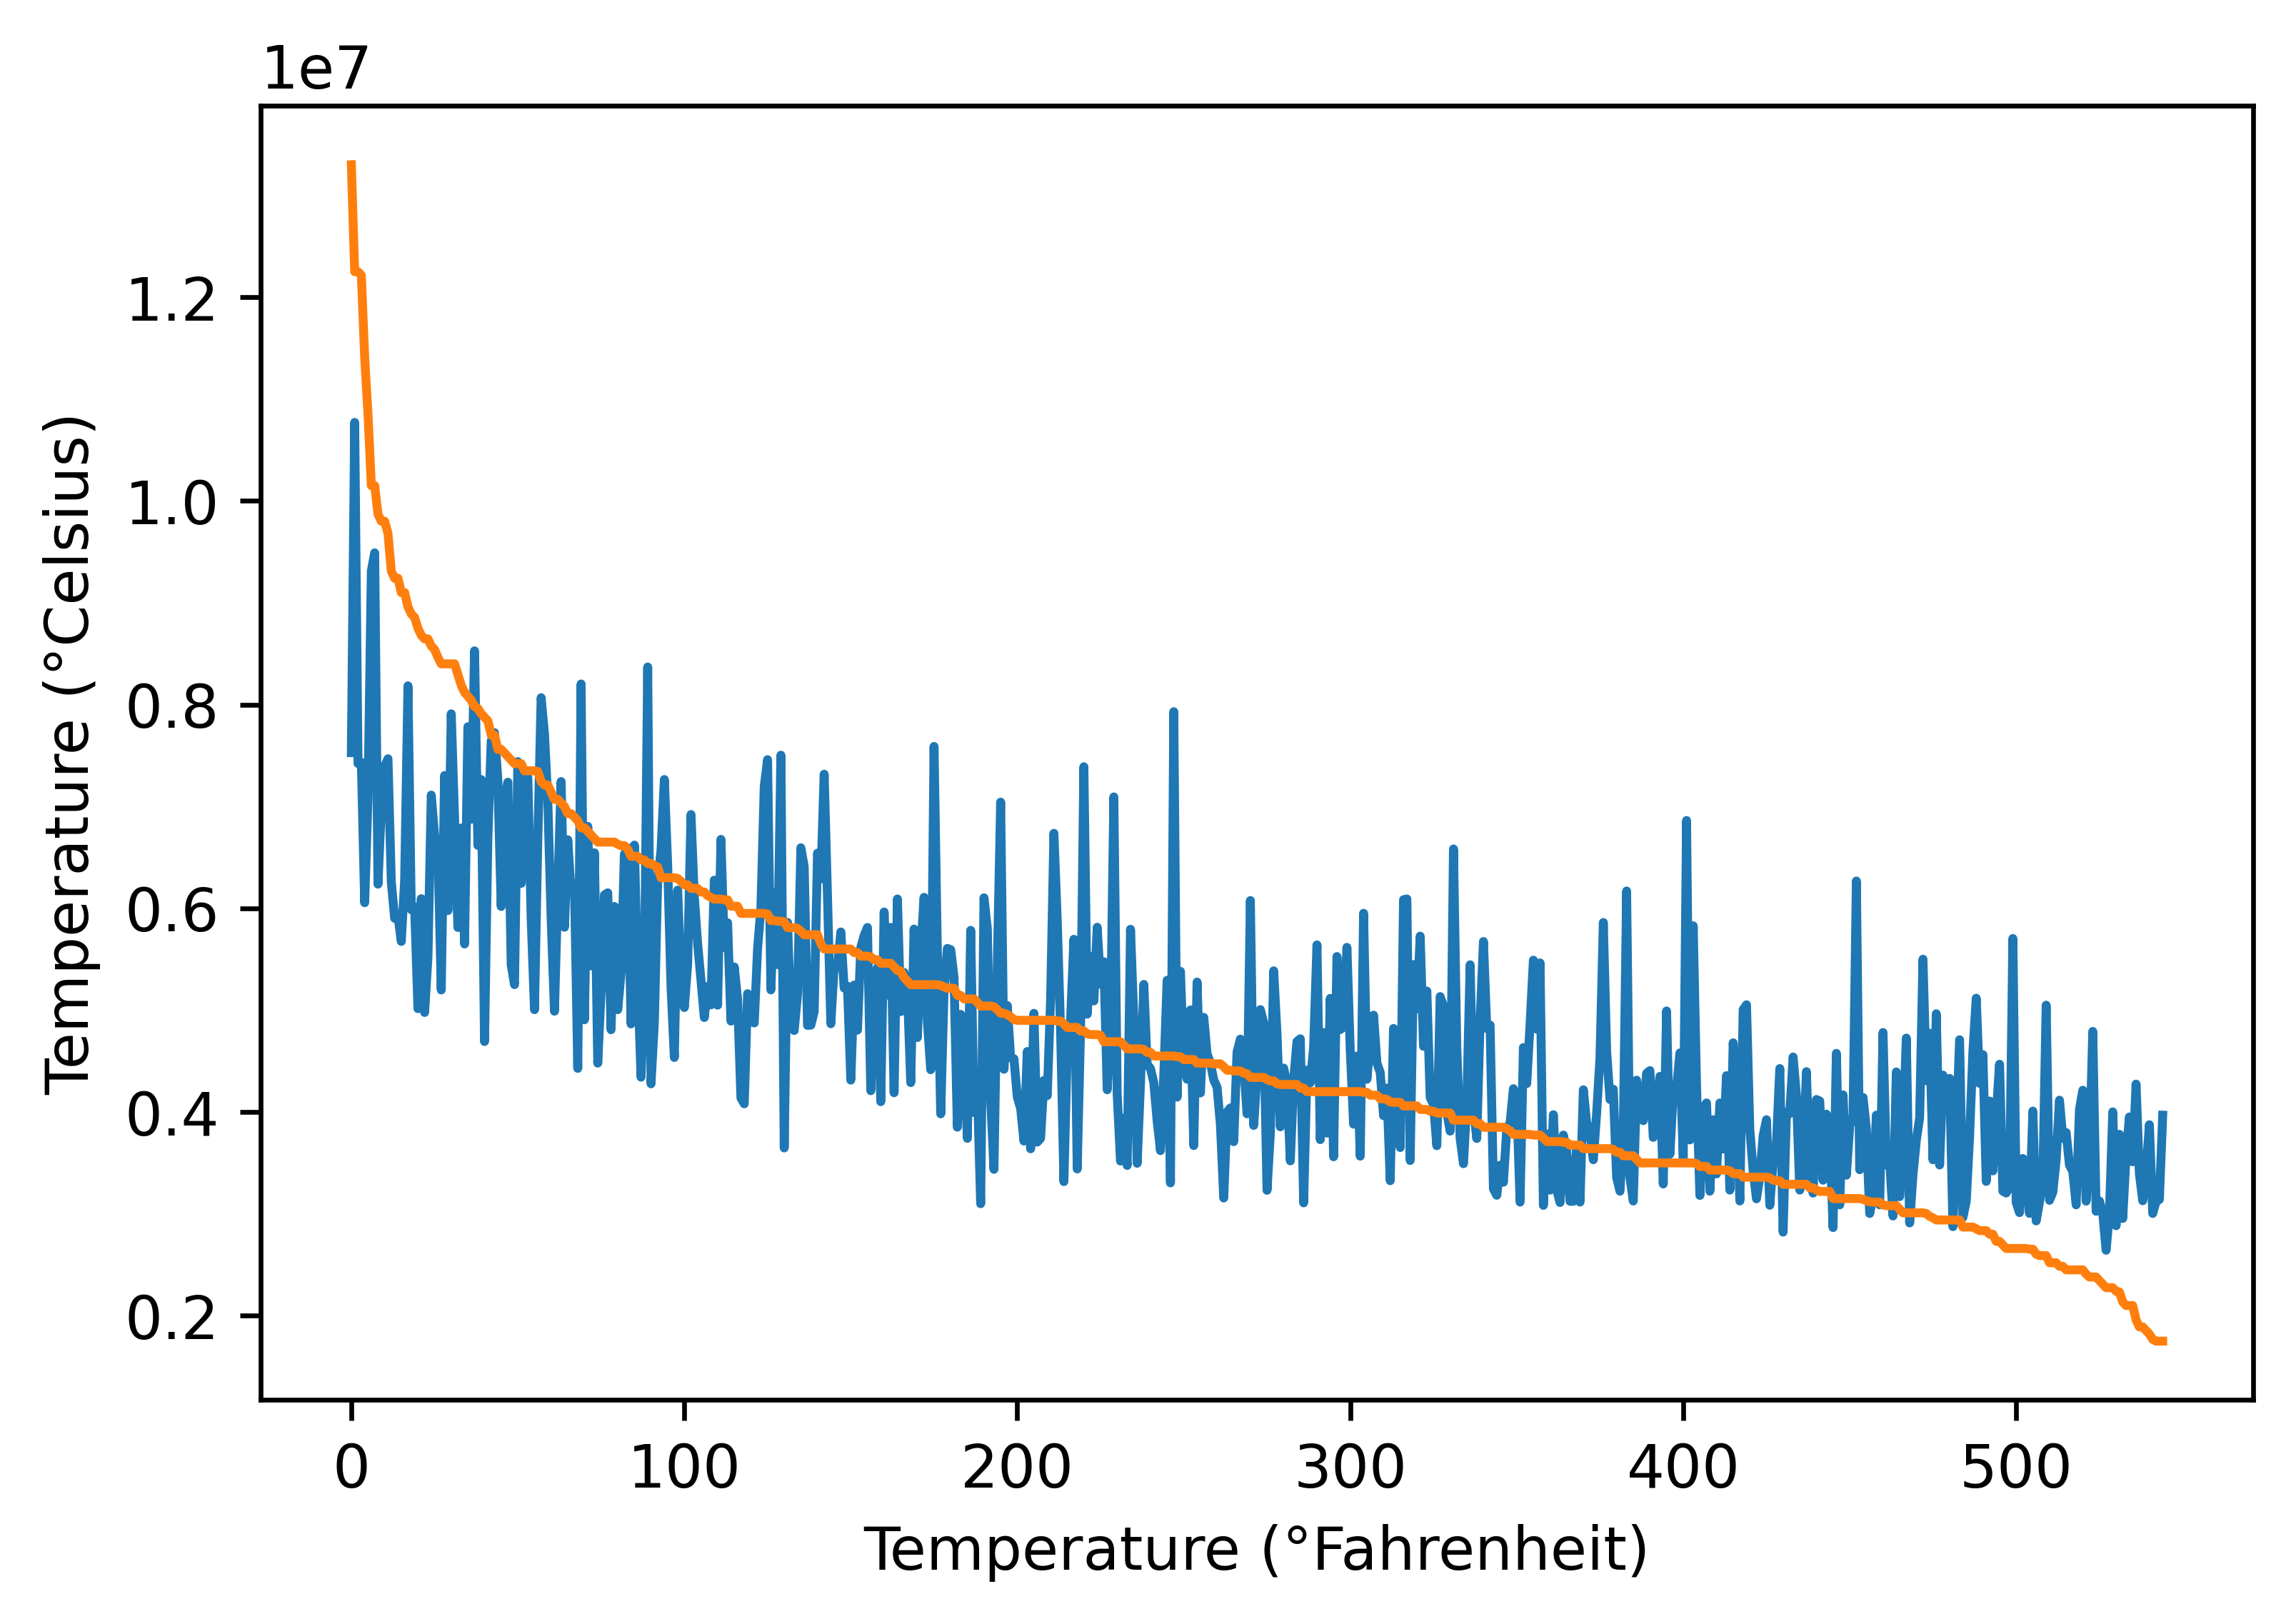

In [48]:
t_p = model(N_t_area, N_t_bedrooms, N_t_bathrooms, N_t_stories, N_t_parking, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)

In [49]:
params = training_loop2(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = N_t_area,
    t_bedrooms = N_t_bedrooms,
    t_bathrooms = N_t_bathrooms,
    t_stories = N_t_stories,
    t_parking = N_t_parking,
    t_price = t_price)

Epoch 500, Loss 3072061341696.000000
Epoch 1000, Loss 2296906776576.000000
Epoch 1500, Loss 2232370855936.000000
Epoch 2000, Loss 2193781817344.000000
Epoch 2500, Loss 2159230582784.000000
Epoch 3000, Loss 2127642755072.000000
Epoch 3500, Loss 2098654216192.000000
Epoch 4000, Loss 2071965073408.000000
Epoch 4500, Loss 2047316459520.000000
Epoch 5000, Loss 2024483717120.000000


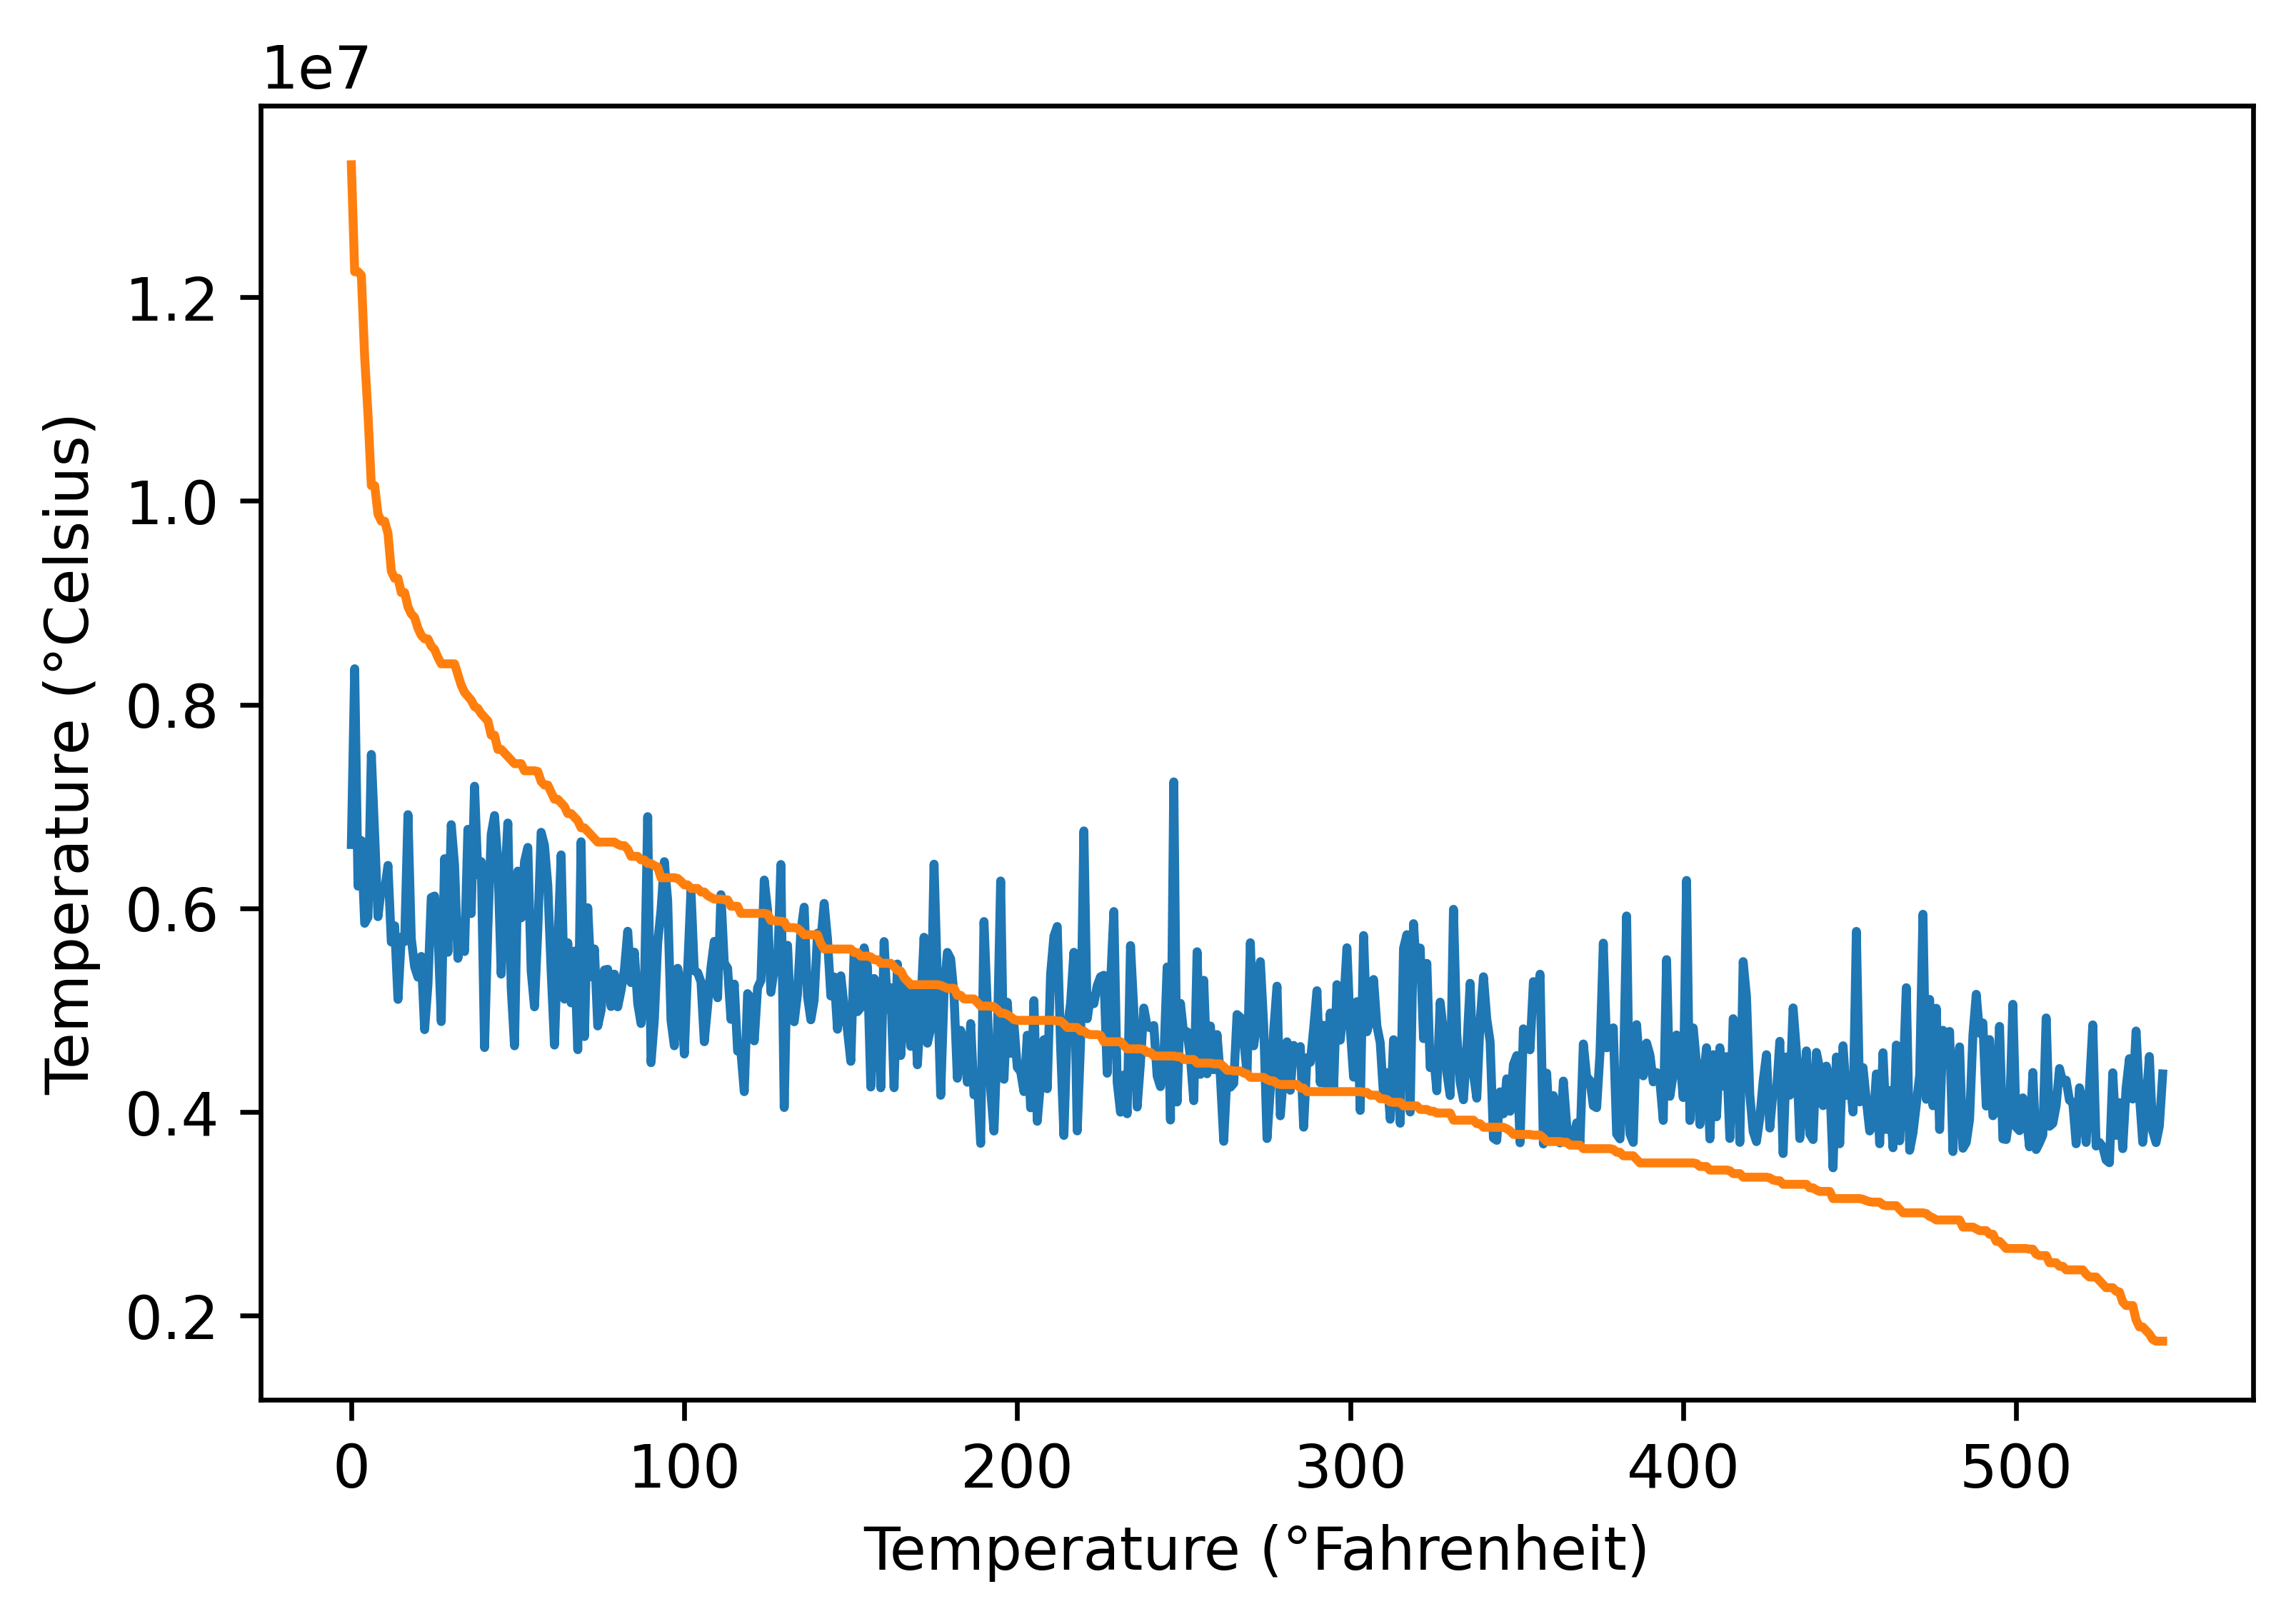

In [50]:
t_p = model(N_t_area, N_t_bedrooms, N_t_bathrooms, N_t_stories, N_t_parking, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)

In [51]:
params = training_loop2(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = N_t_area,
    t_bedrooms = N_t_bedrooms,
    t_bathrooms = N_t_bathrooms,
    t_stories = N_t_stories,
    t_parking = N_t_parking,
    t_price = t_price)

Epoch 500, Loss 19251110871040.000000
Epoch 1000, Loss 14310294159360.000000
Epoch 1500, Loss 10812095725568.000000
Epoch 2000, Loss 8334880538624.000000
Epoch 2500, Loss 6580248510464.000000
Epoch 3000, Loss 5337011716096.000000
Epoch 3500, Loss 4455729725440.000000
Epoch 4000, Loss 3830616424448.000000
Epoch 4500, Loss 3386812137472.000000
Epoch 5000, Loss 3071338610688.000000


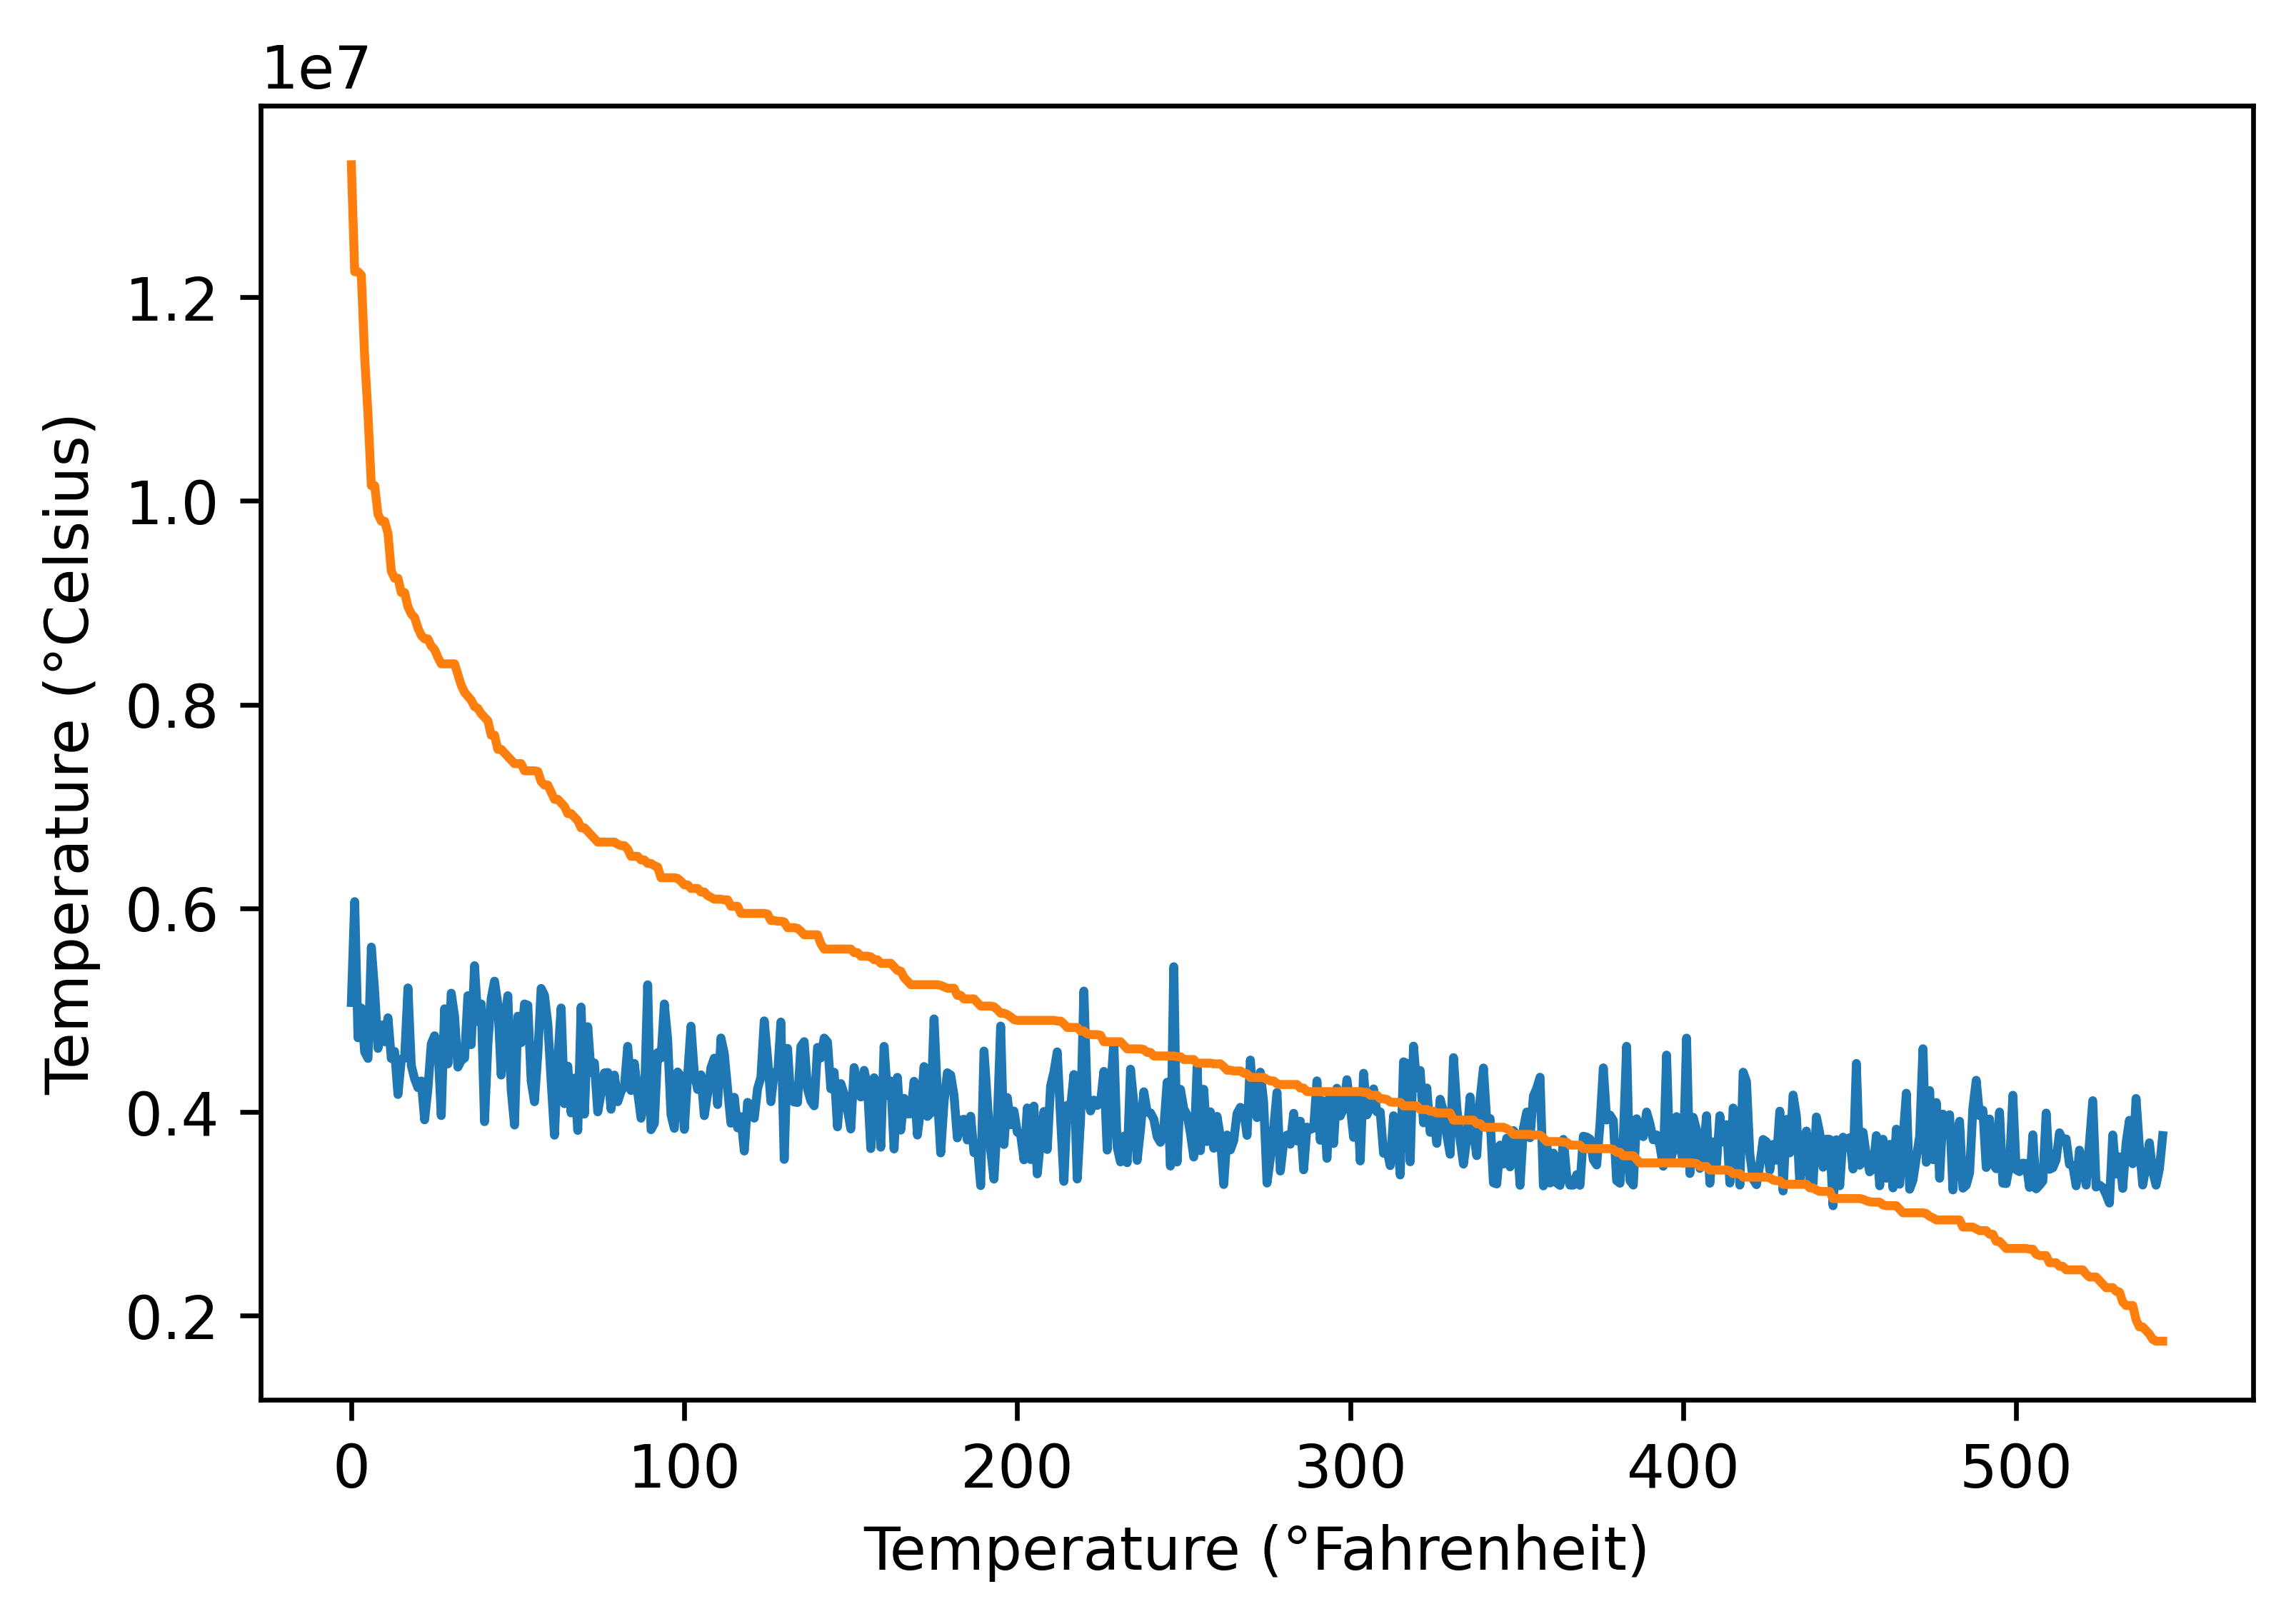

In [52]:
t_p = model(N_t_area, N_t_bedrooms, N_t_bathrooms, N_t_stories, N_t_parking, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)